# DATA SET: concrete.csv

### Author: Kranti Sambhaji Walke¶

### Data Description:
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).
### Domain:
Material manufacturing
### Context:
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
### Attribute Information:
● Cement : measured in kg in a m3 mixture

● Blast : measured in kg in a m3 mixture

● Fly ash : measured in kg in a m3 mixture

● Water : measured in kg in a m3 mixture

● Superplasticizer : measured in kg in a m3 mixture

● Coarse Aggregate : measured in kg in a m3 mixture

● Fine Aggregate : measured in kg in a m3 mixture

● Age : day (1~365)

● Concrete compressive strength measured in MPa

# 1. Deliverable -1 (Exploratory data quality report reflecting the following)

## 1.a. Univariate analysis

### i. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

## Read the data as a data frame

In [2]:
my_data = pd.read_csv('concrete.csv')

##  Basic EDA

In [3]:
my_data.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

The dataset has 1030 observations/samples.

There are 9 numerical variables/features.

The data has 8 quantitative input variables, and 1 quantitative output variable.

The compressive strength of concrete can be calculated by the failure load divided with the cross sectional area resisting the load and reported in pounds per square inch in US customary units and mega pascals (MPa) in SI units. Concrete's compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000psi (28 MPa) and higher in commercial structures. Higher strengths upto and exceeding 10,000 psi (70 MPa) are specified for certain applications.

#### Attribute information:
#### 1.Input Variables (which are all Quantitative)
    Cement:- kg in a m3 mixture 
    Blast Furnace Slag:- kg in a m3 mixture
    Fly Ash :- kg in a m3 mixture
    Water :- kg in a m3 mixture 
    Superplasticizer :- kg in a m3 mixture
    Coarse Aggregate :- kg in a m3 mixture
    Fine Aggregate :- kg in a m3 mixture
    Age :- Day (1~365)
#### 2.Output Variable (Quantitative)    
    Concrete compressive strength :- MPa(megapascals)


## Shape of the data

In [4]:
my_data.shape

(1030, 9)

In [5]:
my_data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

## Data type of each attribute

In [6]:
my_data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

## Checking the presence of missing values

In [7]:
my_data.isnull().values.any()

False

## Data Cleaning

In [8]:
val=my_data.isnull().values.any()

if val==True:
    print("Missing values present : ", my_data.isnull().values.sum())
    my_data=my_data.dropna()
else:
    print("No missing values present")

No missing values present


In [9]:
print("Number of rows    :",my_data.shape[0])
print("Number of columns :",my_data.shape[1])

Number of rows    : 1030
Number of columns : 9


## 5 point summary of numerical attributes

In [10]:
my_data.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

In [11]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Replace strings with an integer

In [12]:
for feature in my_data.columns: # Loop through all columns in the dataframe
    if my_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        my_data[feature] = pd.Categorical(my_data[feature]).codes # Replace strings with an integer

In [13]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Finding unique data

In [14]:
my_data.apply(lambda x: len(x.unique()))

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [15]:
#Find Mean
my_data.mean()

cement          281.167864
slag             73.895825
ash              54.188350
water           181.567282
superplastic      6.204660
coarseagg       972.918932
fineagg         773.580485
age              45.662136
strength         35.817961
dtype: float64

In [16]:
#Find Median
my_data.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [17]:
#Find Standard Deviation
my_data.std()

cement          104.506364
slag             86.279342
ash              63.997004
water            21.354219
superplastic      5.973841
coarseagg        77.753954
fineagg          80.175980
age              63.169912
strength         16.705742
dtype: float64

## Measure of skewness

In [18]:
my_data.skew(axis = 0, skipna = True)

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

## Checking the presence of outliers

### Cement 

In [19]:
# Quartiles
print('1º Quartile: ', my_data['cement'].quantile(q = 0.25))
print('2º Quartile: ', my_data['cement'].quantile(q = 0.50))
print('3º Quartile: ', my_data['cement'].quantile(q = 0.75))
print('4º Quartile: ', my_data['cement'].quantile(q = 1.00))

# Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('cement above: ', my_data['cement'].quantile(q = 0.75) + 
                      1.5*(my_data['cement'].quantile(q = 0.75) - my_data['cement'].quantile(q = 0.25)), 'are outliers')


1º Quartile:  192.375
2º Quartile:  272.9
3º Quartile:  350.0
4º Quartile:  540.0
cement above:  586.4375 are outliers


In [20]:
print('Numerber of outliers: ', my_data[my_data['cement'] >  119.5]['cement'].count())
print('cement: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['cement'] >  119.5]['cement'].count()*100/len(my_data),2), '%')

Numerber of outliers:  1018
cement:  1030
Outliers are: 98.83 %


### slag

In [21]:
# Quartiles
print('slag above: ', my_data['slag'].quantile(q = 0.75) + 
                      1.5*(my_data['slag'].quantile(q = 0.75) - my_data['slag'].quantile(q = 0.25)), 'are outliers')


slag above:  357.375 are outliers


In [22]:
print('Numerber of outliers: ', my_data[my_data['slag'] >  62.5]['slag'].count())
print('slag: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['slag'] >  62.5]['slag'].count()*100/len(my_data),2), '%')


Numerber of outliers:  449
slag:  1030
Outliers are: 43.59 %


### ash

In [23]:
# Quartiles
print('ash above: ', my_data['ash'].quantile(q = 0.75) + 
                      1.5*(my_data['ash'].quantile(q = 0.75) - my_data['ash'].quantile(q = 0.25)), 'are outliers')

ash above:  295.75 are outliers


In [24]:
print('Numerber of outliers: ', my_data[my_data['ash'] >  62.5]['ash'].count())
print('ash: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['ash'] >  62.5]['ash'].count()*100/len(my_data),2), '%')

Numerber of outliers:  447
ash:  1030
Outliers are: 43.4 %


### water 

In [25]:
# Quartiles
print('water above: ', my_data['water'].quantile(q = 0.75) + 
                      1.5*(my_data['water'].quantile(q = 0.75) - my_data['water'].quantile(q = 0.25)), 'are outliers')

water above:  232.64999999999998 are outliers


In [26]:
print('Numerber of outliers: ', my_data[my_data['water'] >  62.5]['water'].count())
print('water: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['water'] >  62.5]['water'].count()*100/len(my_data),2), '%')

Numerber of outliers:  1030
water:  1030
Outliers are: 100.0 %


### superplastic 

In [27]:
# Quartiles
print('superplastic above: ', my_data['superplastic'].quantile(q = 0.75) + 
                      1.5*(my_data['superplastic'].quantile(q = 0.75) - my_data['superplastic'].quantile(q = 0.25)), 'are outliers')

superplastic above:  25.5 are outliers


In [28]:
print('Numerber of outliers: ', my_data[my_data['superplastic'] >  62.5]['superplastic'].count())
print('superplastic: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['superplastic'] >  62.5]['superplastic'].count()*100/len(my_data),2), '%')

Numerber of outliers:  0
superplastic:  1030
Outliers are: 0.0 %


### coarseagg 

In [29]:
# Quartiles
print('coarseagg above: ', my_data['coarseagg'].quantile(q = 0.75) + 
                      1.5*(my_data['coarseagg'].quantile(q = 0.75) - my_data['coarseagg'].quantile(q = 0.25)), 'are outliers')

coarseagg above:  1175.5000000000002 are outliers


In [30]:
print('Numerber of outliers: ', my_data[my_data['coarseagg'] >  62.5]['coarseagg'].count())
print('coarseagg: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['coarseagg'] >  62.5]['coarseagg'].count()*100/len(my_data),2), '%')

Numerber of outliers:  1030
coarseagg:  1030
Outliers are: 100.0 %


### fineagg 

In [31]:
# Quartiles
print('fineagg above: ', my_data['fineagg'].quantile(q = 0.75) + 
                      1.5*(my_data['fineagg'].quantile(q = 0.75) - my_data['fineagg'].quantile(q = 0.25)), 'are outliers')

fineagg above:  963.575 are outliers


In [32]:
print('Numerber of outliers: ', my_data[my_data['fineagg'] >  62.5]['fineagg'].count())
print('fineagg: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['fineagg'] >  62.5]['fineagg'].count()*100/len(my_data),2), '%')

Numerber of outliers:  1030
fineagg:  1030
Outliers are: 100.0 %


### age 

In [33]:
# Quartiles
print('age above: ', my_data['age'].quantile(q = 0.75) + 
                      1.5*(my_data['age'].quantile(q = 0.75) - my_data['age'].quantile(q = 0.25)), 'are outliers')

age above:  129.5 are outliers


In [34]:
print('Numerber of outliers: ', my_data[my_data['age'] >  62.5]['age'].count())
print('age: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['age'] >  62.5]['age'].count()*100/len(my_data),2), '%')

Numerber of outliers:  190
age:  1030
Outliers are: 18.45 %


### strength 

In [35]:
# Quartiles
print('strength above: ', my_data['strength'].quantile(q = 0.75) + 
                      1.5*(my_data['strength'].quantile(q = 0.75) - my_data['strength'].quantile(q = 0.25)), 'are outliers')

strength above:  79.77250000000001 are outliers


In [36]:
print('Numerber of outliers: ', my_data[my_data['strength'] >  62.5]['strength'].count())
print('strength: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['strength'] >  62.5]['strength'].count()*100/len(my_data),2), '%')

Numerber of outliers:  75
strength:  1030
Outliers are: 7.28 %


# 1.b. Multivariate analysis
## i. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

## Calculate the correlation matrix 

In [37]:
cor=my_data.corr()
cor

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

## Heatmap 

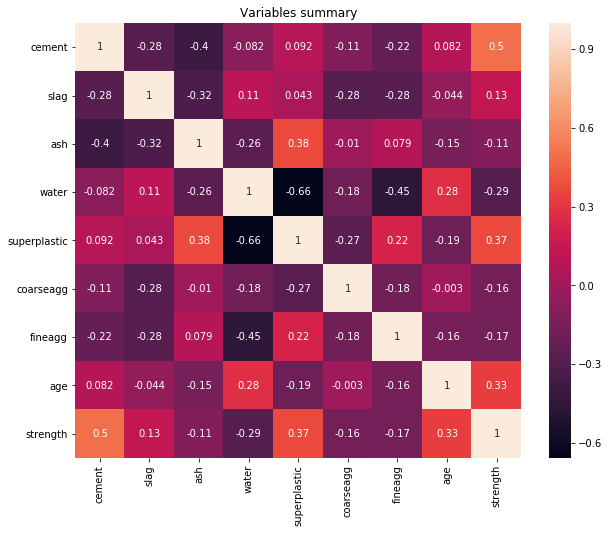

In [38]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)
plt.title("Variables summary")
plt.show()

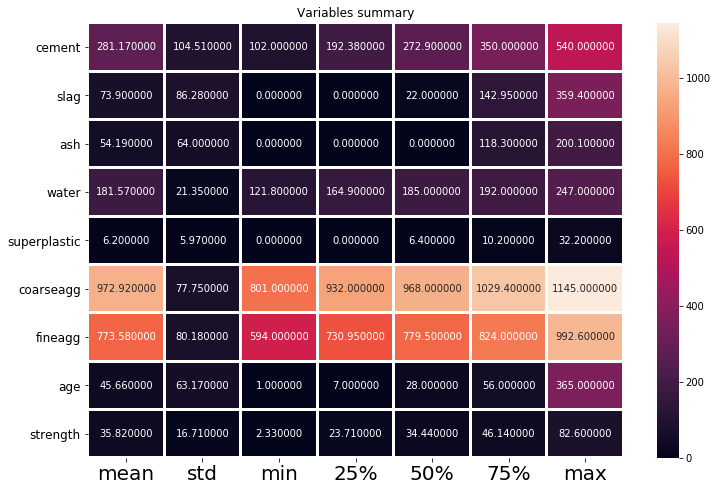

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(round(my_data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

## Distribution of Independent variables/Ingredients

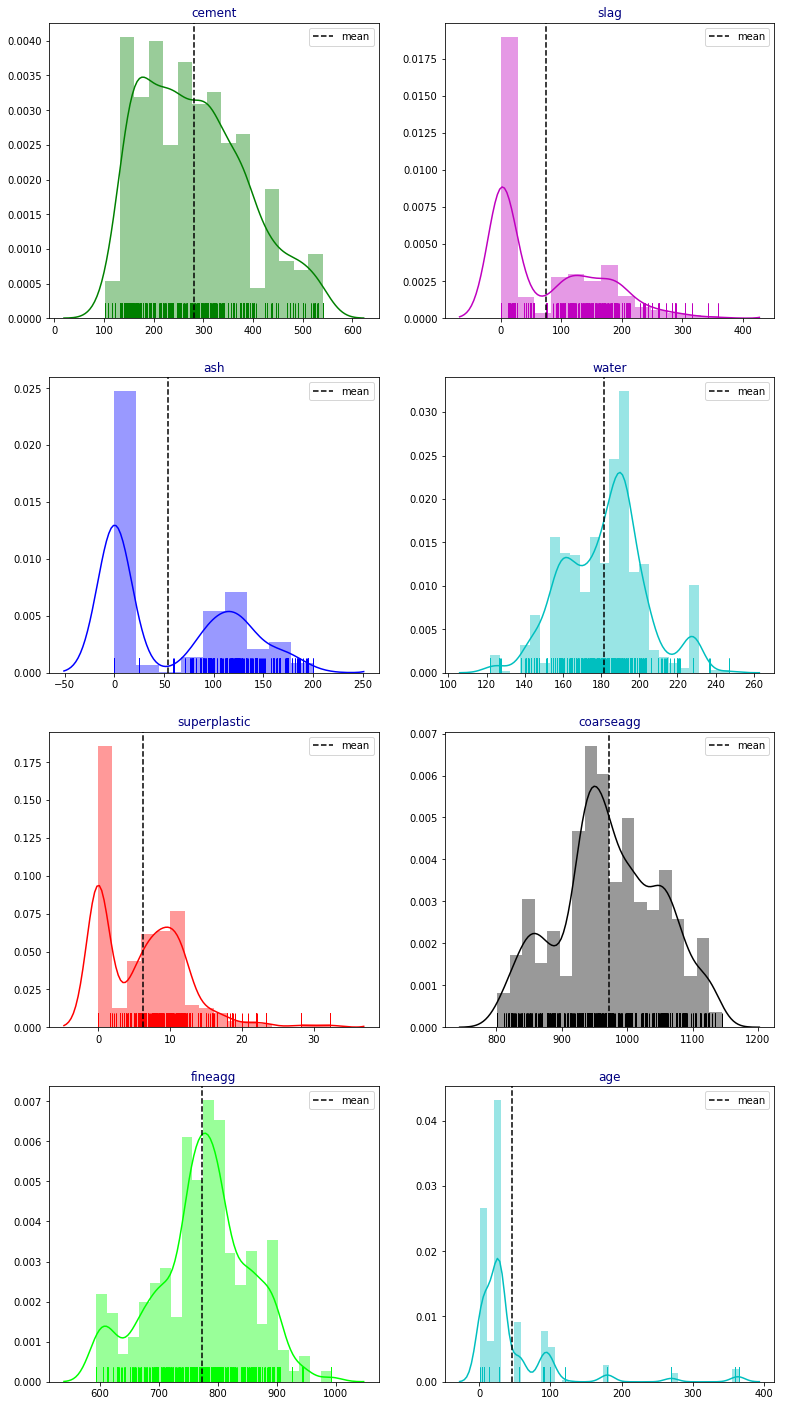

In [40]:
import itertools

cols = [i for i in my_data.columns if i not in 'strength']
length = len(cols)
cs = ["g","m","b","c","r","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(my_data[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(my_data[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Observations:

### Here we can see the distributions of "Cement" and "fineagg" attributes are almost Normal.
### Attributes "Slag" and "Ash" show that there are 2 clusters present each.
### There are 3 peaks showing for "Water" attribute.
### Also "Coarseagg" and "Age" show 3 peaks each.
### Attribute "Superplastic" shows 2 clusters.

## Distribution of Strength 

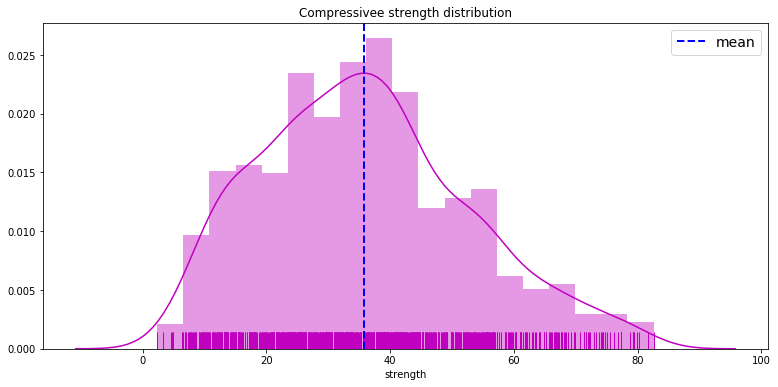

In [41]:
plt.figure(figsize=(13,6))
sns.distplot(my_data["strength"],color="m",rug=True)
plt.axvline(my_data["strength"].mean(),
            linestyle="dashed",color="b",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

# Observation:
## Here we can see the distribution of "Strength" is almost Normal.

## Pair plot  

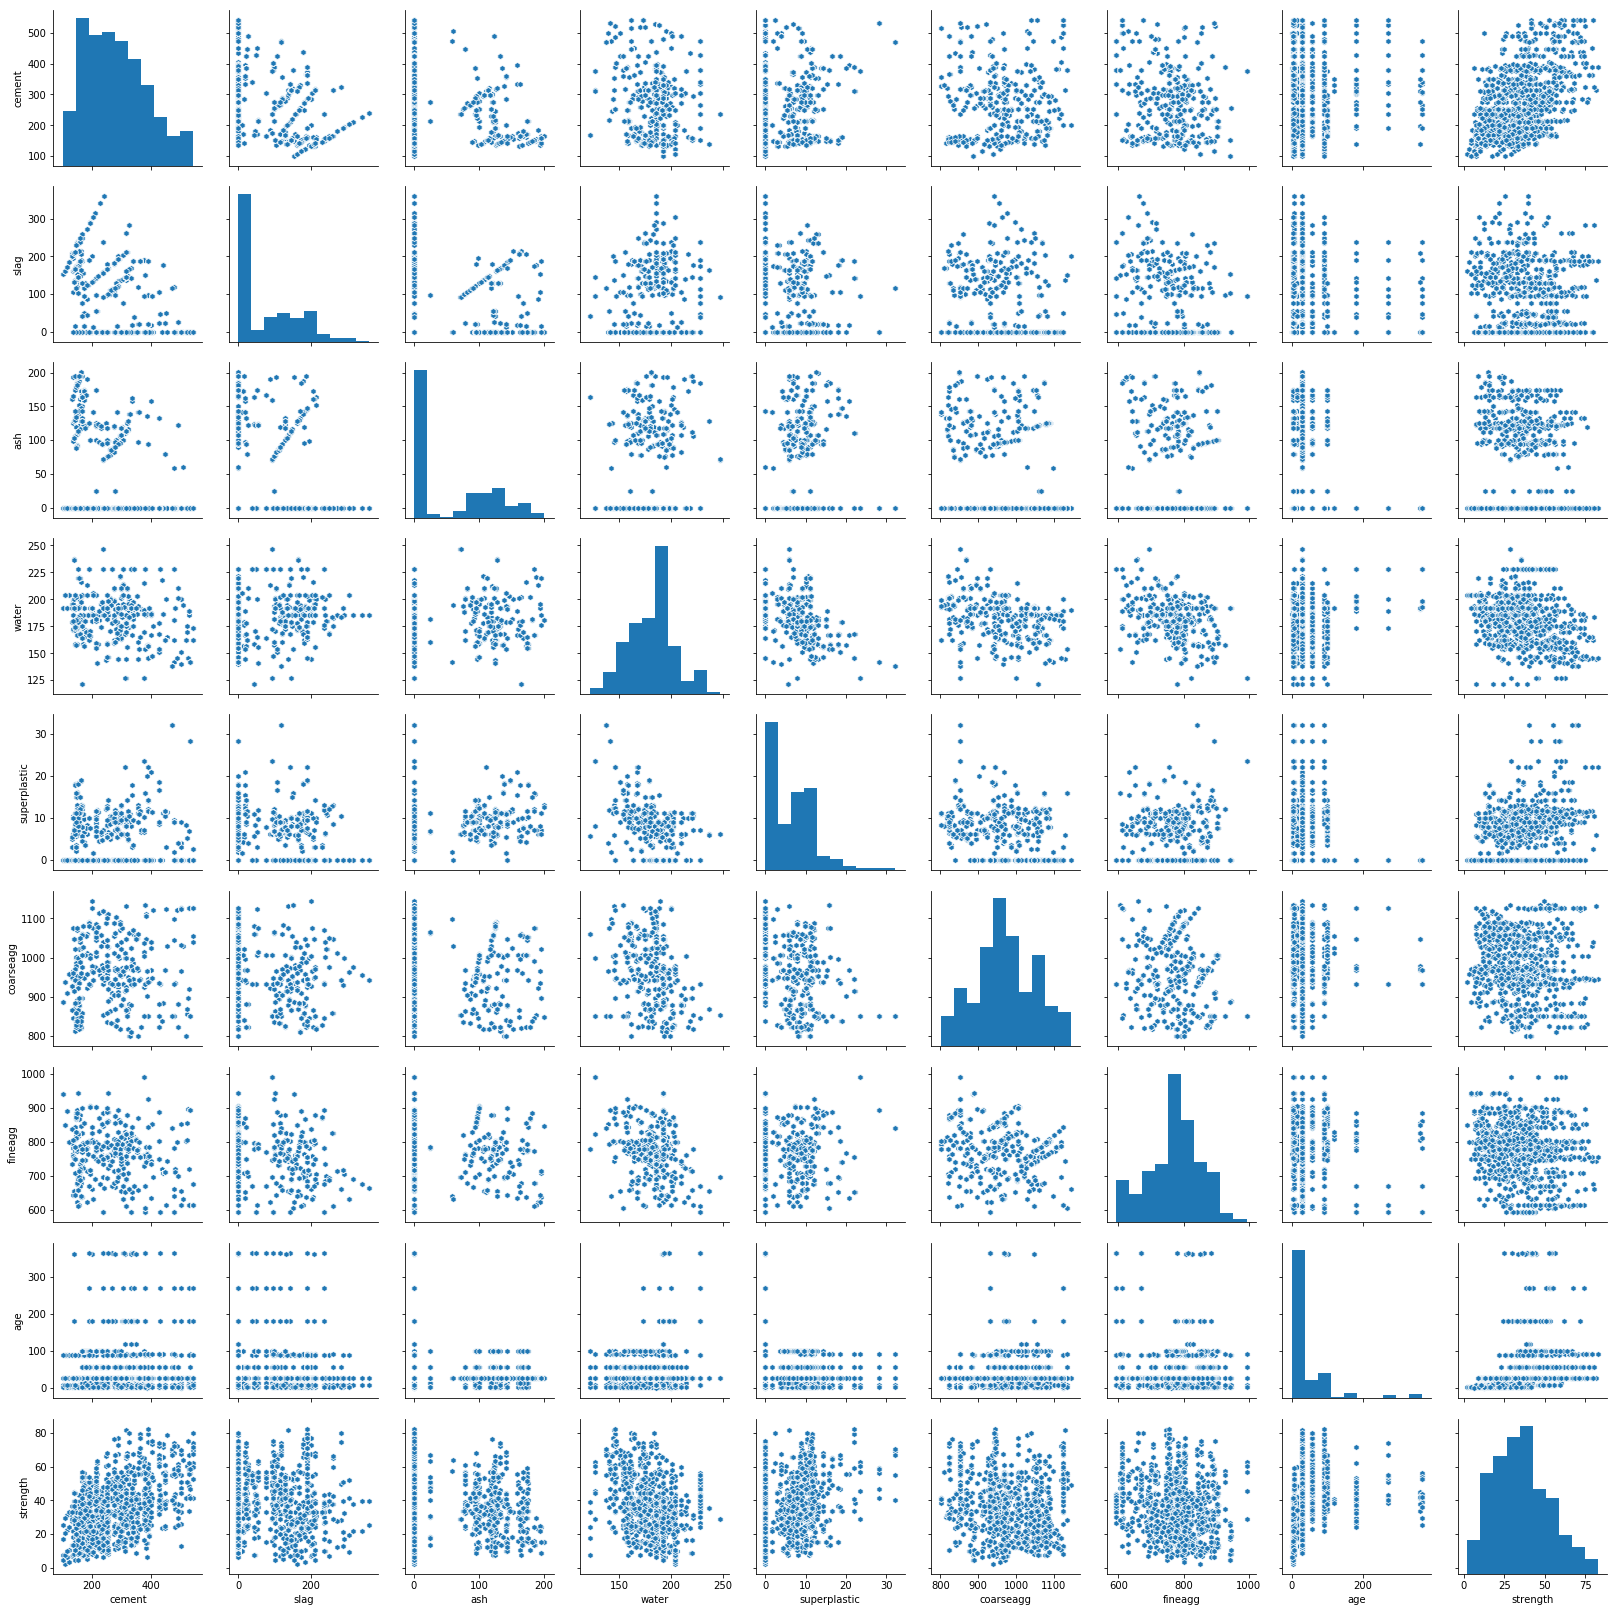

In [42]:
sns.pairplot(my_data,markers="h")
plt.show()

## Ploting histogram to check that if data columns are normal or almost normal or not ,as we saw in above graphs/plots 

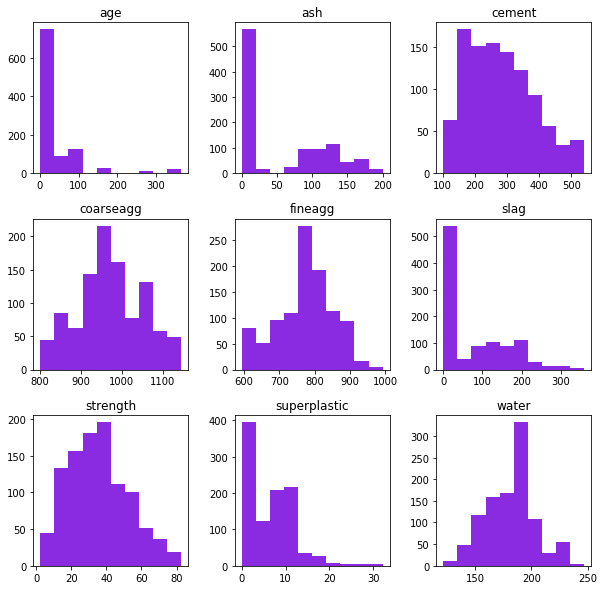

In [43]:
my_data.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

# Observations:

### Here we can see that for attributes :
###              'cement','coarseagg''fineagg','strength' and 'water' the distribution is almost Normal.
### But the distribution of attributes:
###              'age','ash''slag and 'superplastic' is positively right skewed.

### Also we can not predict dependency/corelation of indepndent attiributes easily here.

## Density Plot

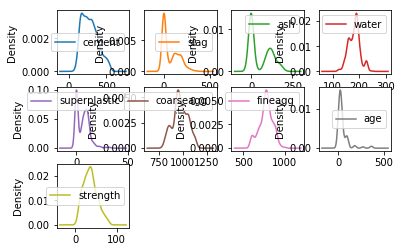

In [44]:
my_data.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()

## Kde Plot
## Contour plot between "Independet variable/Ingredients" and "compressive strength" 

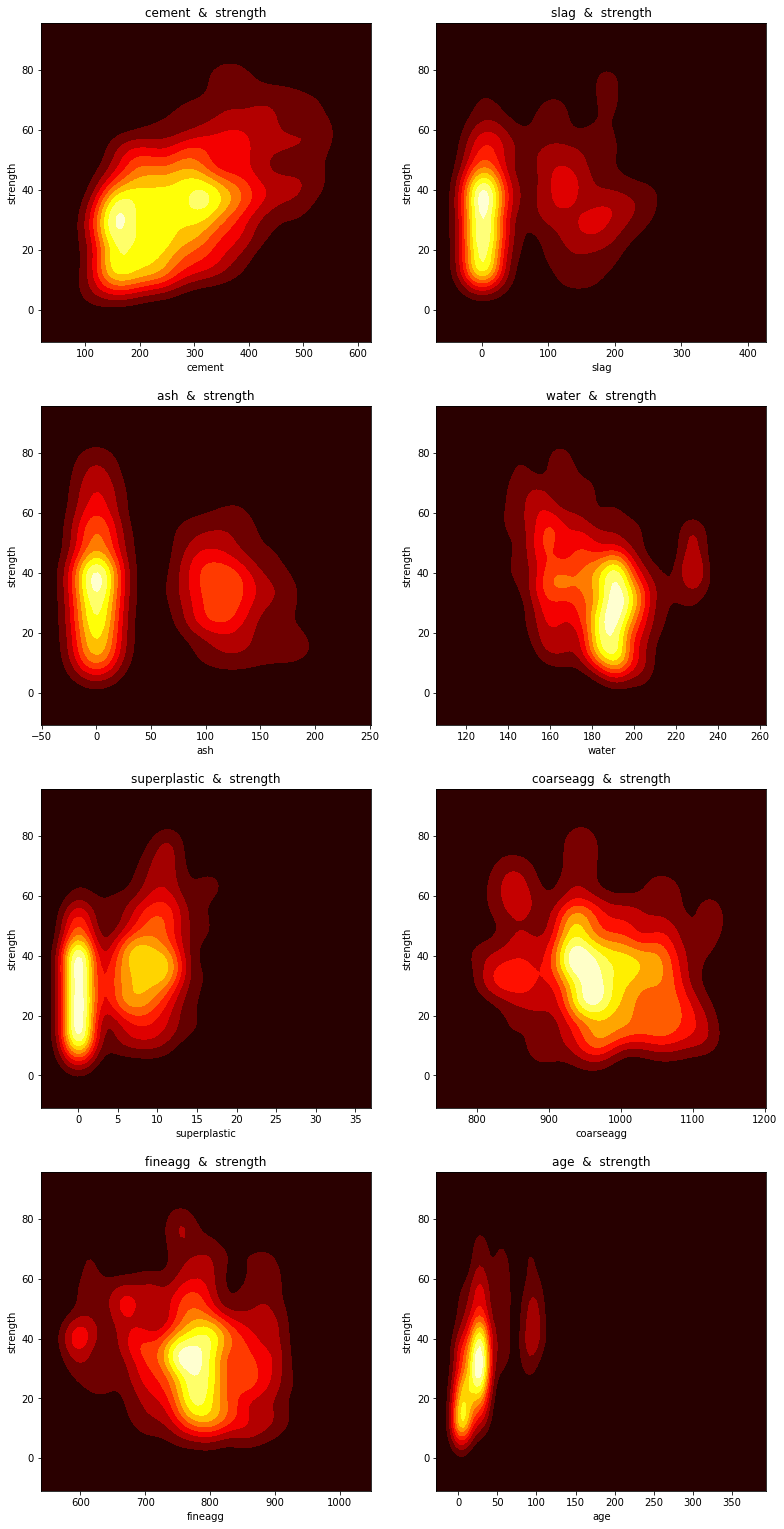

In [45]:
cols = [i for i in my_data.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(my_data[i],
                my_data["strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  strength")

## Swarm plot for variables 

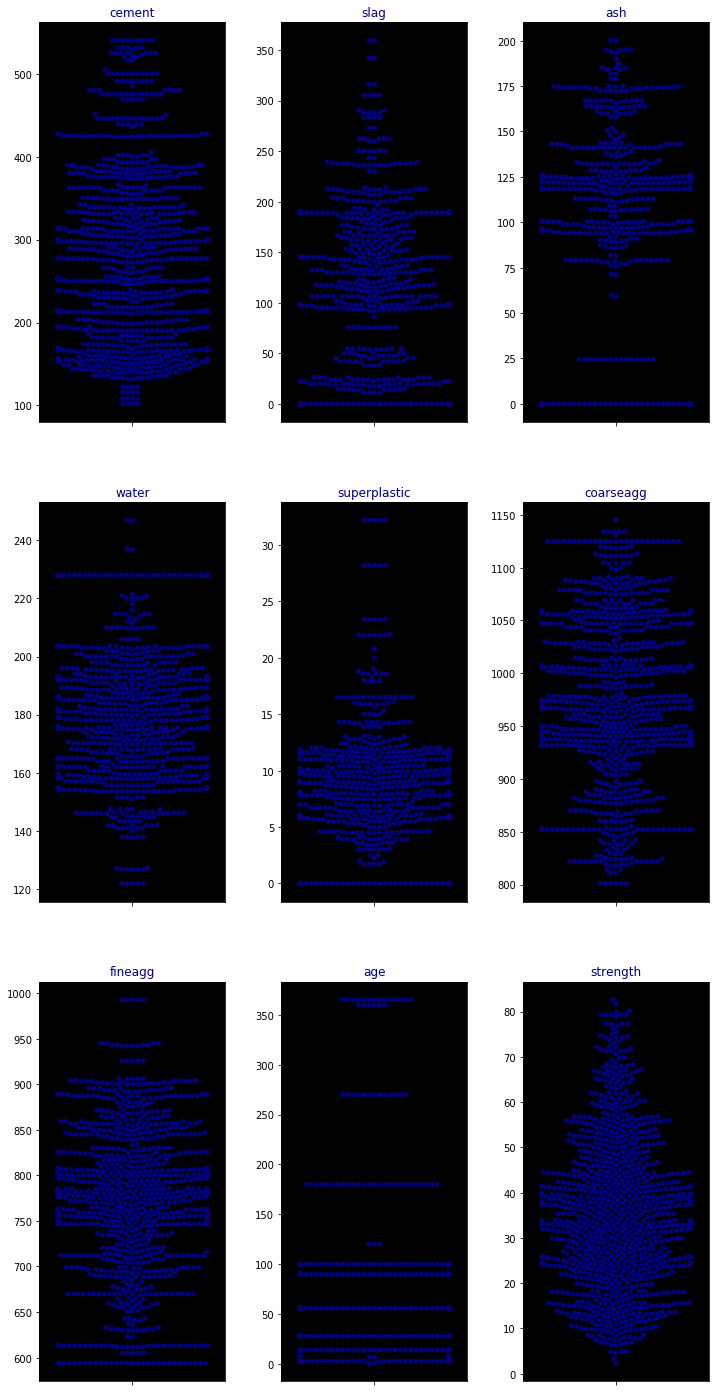

In [46]:
cols = ['cement', 'slag', 'ash', 'water', 'superplastic',
       'coarseagg', 'fineagg', 'age', 'strength'] 

length = len(cols)

plt.figure(figsize=(12,25))

for i,j in itertools.zip_longest(cols,range(length)):
    
    plt.subplot(3,3,j+1)
    ax = sns.swarmplot( y = my_data[i],color="navy")
    ax.set_facecolor("k")
    ax.set_ylabel("")
    ax.set_title(i,color="navy")
    plt.subplots_adjust(wspace = .3)

## 3D plot for cement ,compressive strength and superplastic
    •X - Axis = cement.
    •Y - Axis = compressive strength.
    •Z - Axis = super plasticizer.
    •Color = Age 

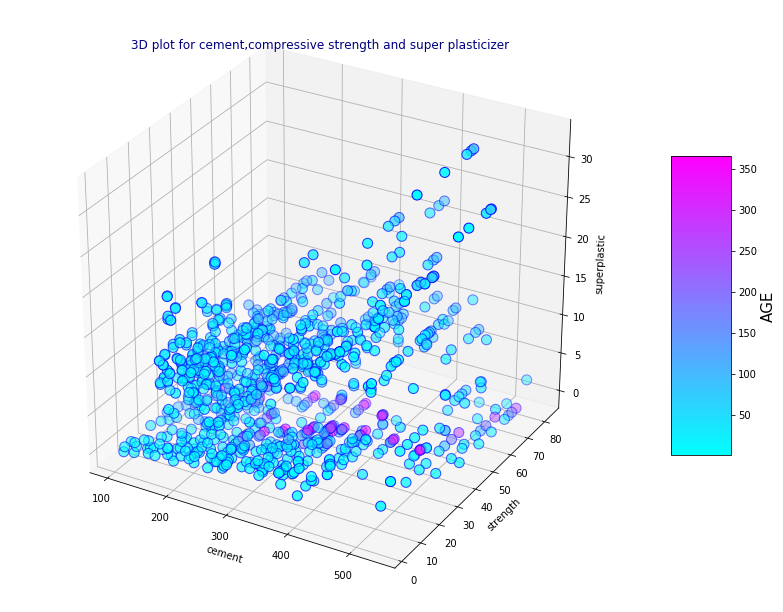

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(my_data["cement"],
           my_data["strength"],
           my_data["superplastic"],
           linewidth=1,edgecolor ="b",
           c=my_data["age"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("strength")
ax.set_zlabel("superplastic")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE",fontsize = 15)

plt.title("3D plot for cement,compressive strength and super plasticizer",color="navy")
plt.show()

## Converting the Age from days to Months

In [48]:
data=pd.read_csv('concrete.csv')

In [49]:
#'1 month','2 months', '3 months','4 months',............'12 months'

In [50]:
def label(data):
    if data["age"] <= 30:
        return "1" #1 month
    if data["age"] > 30 and data["age"] <= 60 :
        return "2"#2 months
    if data["age"] > 60 and data["age"] <= 90 :
        return "3"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11"
    if data["age"] > 330 :
        return "12"
data["age_months"] = data.apply(lambda data:label(data) , axis=1)

## Bar Plot
### Age distribution in months 

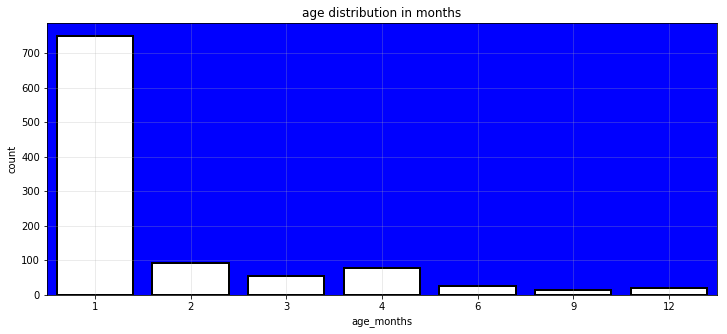

In [51]:
plt.figure(figsize=(12,5))
order = ['1','2', '3','4','6','9', '12']
ax = sns.countplot(data["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("blue")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

## Point Plot
### Compreesive strength by months

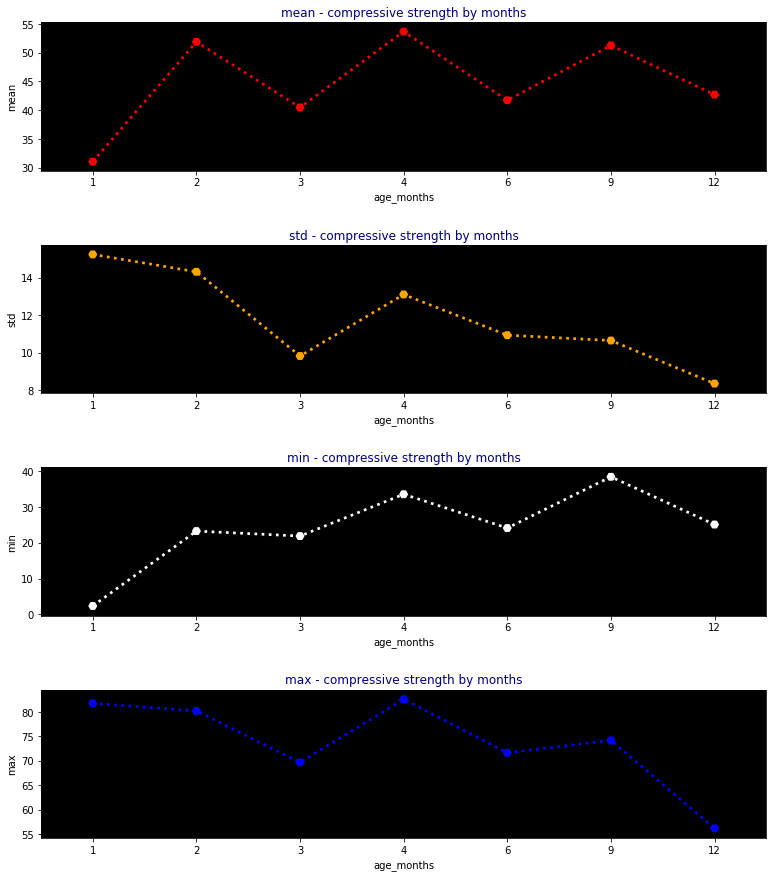

In [52]:
age_mon = data.groupby("age_months")["strength"].describe().reset_index()

#order  = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
order = ['1','2', '3','4','6','9', '12']
cols   = [ 'mean', 'std' , 'min' , 'max']
length = len(cols)
cs     = ["r","orange","white","b"] 

fig = plt.figure(figsize=(13,15))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,1,j+1)
    ax = sns.pointplot("age_months",i,data=age_mon,
                       order=order,
                       markers="H",
                       linestyles="dotted",color=k)
    plt.subplots_adjust(hspace=.5)
    ax.set_facecolor("k")
    plt.title(i+" - compressive strength by months",color="navy")

## parallel coordinates plot for 3 categories
   •Concrete's compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000psi (28 MPa) and higher in commercial structures. Higher strengths upto and exceeding 10,000 psi (70 MPa) are specified for certain applications.
   
   
   
   
## Wrapping the "Compressive strength" in 3 categories.
    •category 1 - MPa less than 17.
    •category 2 - MPa in between 17 to 28.
    •category 3 - MPa greater than 28.

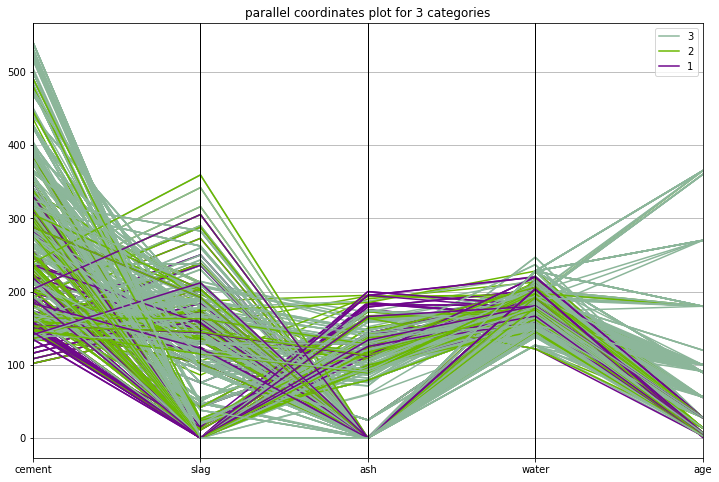

In [53]:
data2  =  data.copy()

def lab(data2):
    if data2["strength"] <= 17:
        return "1"#"category 1"
    if data2["strength"] >17 and data2["strength"] <= 28 :
        return "2" #"category 2"
    if data2["strength"] >28 :
        return "3" #"category 3 "
    
data2["compressive_strength_category"] = data2.apply(lambda data2:lab(data2) ,axis =1)

from pandas.plotting import parallel_coordinates

cols1 = ['cement', 'slag','ash', 'water',"compressive_strength_category",'age']

plt.figure(figsize=(12,8))
parallel_coordinates(data2[cols1],"compressive_strength_category")
plt.title("parallel coordinates plot for 3 categories")
plt.show()

In [54]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 11 columns):
cement                           1030 non-null float64
slag                             1030 non-null float64
ash                              1030 non-null float64
water                            1030 non-null float64
superplastic                     1030 non-null float64
coarseagg                        1030 non-null float64
fineagg                          1030 non-null float64
age                              1030 non-null int64
strength                         1030 non-null float64
age_months                       1030 non-null object
compressive_strength_category    1030 non-null object
dtypes: float64(8), int64(1), object(2)
memory usage: 88.6+ KB


## Scatter plot between 'cement' and 'water'
    •X - axis = water.
    •Y - axis = cement.
    •SIZE and COLOR = compressive strength.

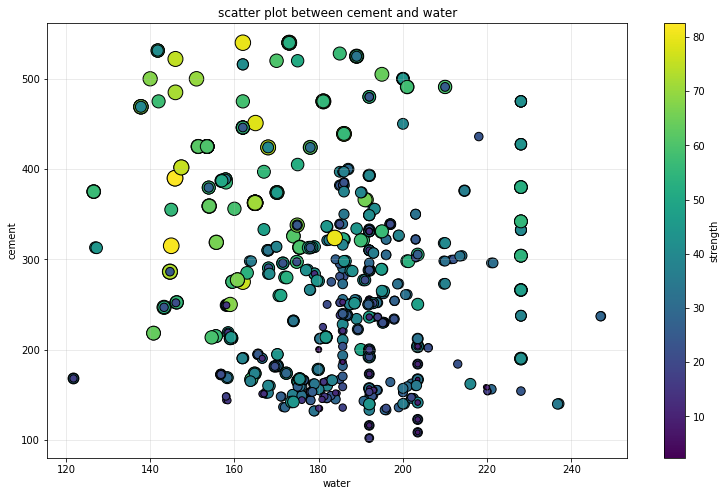

In [55]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(data["water"],data["cement"],
            c=data["strength"],s=data["strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

## Scatter plot between 'fineagg' and 'coarseagg'.
    •X - axis = fineagg.
    •Y - axis = coarseagg.
    •SIZE and COLOR = compressive strength

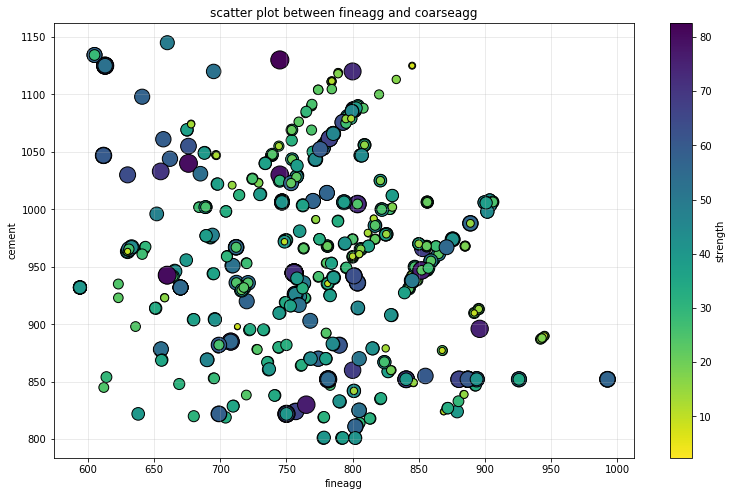

In [56]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(data["fineagg"],data["coarseagg"],
            c=data["strength"],s=data["strength"]*4,
            linewidth=1,edgecolor="k",cmap="viridis_r")
ax.set_facecolor("w")
ax.set_xlabel("fineagg")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("scatter plot between fineagg and coarseagg")
plt.grid(True,alpha=.3)
plt.show()

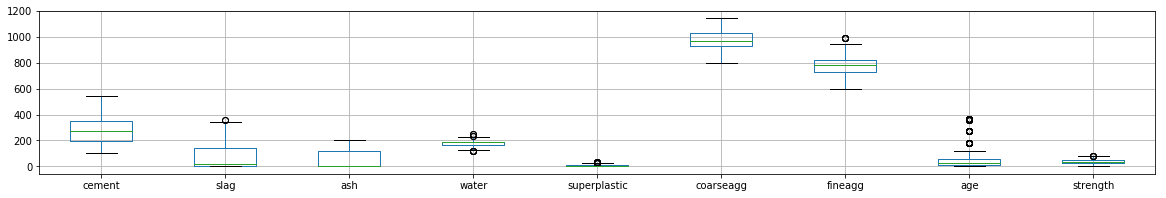

In [57]:
data.boxplot(figsize=(20,3))

## 1.c. Strategies to address the different data challenges such as data pollution, outliers and missing values

# Observations:
## Here we can see that the No. of outliers present for attribute:
    cement:  1018 (Outliers are: 98.83 %)
    slag:  449 (Outliers are: 43.59 %)
    ash: 447 (Outliers are: 43.4 %)
    water:  1030 (Outliers are: 100.0 %)
    superplastic:  0 (Outliers are: 0.0 %)
    coarseagg:  1030 (Outliers are: 100.0 %)
    fineagg:  1030 (Outliers are: 100.0 %)
    age: 190 (Outliers are: 18.45 %)
    strength:  75 (Outliers are: 7.28 %)
   
## We can say that there are so many outliers presents as the variables are totally independent. And also carries different values.
## So it is not possible to replace the outliers by mean/median as there will be loss of most of the important data.
## There is no any missing value present.
## Data pollution is noticeable.
## We can drop the Attributes : 'ash','coarseagg','fineagg',  As those are not that much important for our model.

# 2. Deliverable -2 (Feature Engineering techniques)
## 2.a. Identify opportunities (if any) to create a composite feature, drop a feature

### # Target imbalance

In [58]:
Target_Imb=data2["compressive_strength_category"].value_counts(normalize=True)
if Target_Imb[0]>0.65:
    print("Target imbalance exists")

Target_Imb

3    0.649515
2    0.206796
1    0.143689
Name: compressive_strength_category, dtype: float64

### # Lets check for highly correlated variables

In [59]:
cor= my_data.corr()
cor.loc[:,:] = np.tril(cor,k=-1)  # reference:https://www.geeksforgeeks.org/numpy-tril-python/
cor=cor.stack()
cor[(cor > 0.55) | (cor< -0.55)]

superplastic  water   -0.657533
dtype: float64

## Apply Feature selection method to find which features fits well and do the plotting 
### a.Features selection

In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [61]:
x = my_data.drop('strength', axis = 1)
y = my_data['strength']

In [62]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [63]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (721, 8) (721,)
Testing dataset shape: (309, 8) (309,)


In [64]:
x.shape

(1030, 8)

In [65]:
# Build Linear Regression  to use in feature selection
linR = LinearRegression()

In [66]:
# Build step forward feature selection
sfs1 = sfs(linR, k_features=5, forward=True, scoring='r2', cv=5)

In [67]:
# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [68]:
sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.24694817, 0.22856441, 0.27317071, 0.29434551, 0.25412144]),
  'avg_score': 0.2594300484486841,
  'feature_names': ('0',),
  'ci_bound': 0.02899498425686779,
  'std_dev': 0.022559082806756295,
  'std_err': 0.011279541403378146},
 2: {'feature_idx': (0, 4),
  'cv_scores': array([0.35522639, 0.35333694, 0.33790701, 0.39833764, 0.35842885]),
  'avg_score': 0.3606473665240385,
  'feature_names': ('0', '4'),
  'ci_bound': 0.025868738693255115,
  'std_dev': 0.02012675754942879,
  'std_err': 0.010063378774714395},
 3: {'feature_idx': (0, 4, 7),
  'cv_scores': array([0.48252748, 0.44512459, 0.48300176, 0.46623363, 0.48672252]),
  'avg_score': 0.47272199567389406,
  'feature_names': ('0', '4', '7'),
  'ci_bound': 0.019924510620837638,
  'std_dev': 0.01550194616412345,
  'std_err': 0.007750973082061726},
 4: {'feature_idx': (0, 1, 4, 7),
  'cv_scores': array([0.56185255, 0.51839926, 0.5028864 , 0.558415  , 0.55966515]),
  'avg_score': 0.5402436707

In [69]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

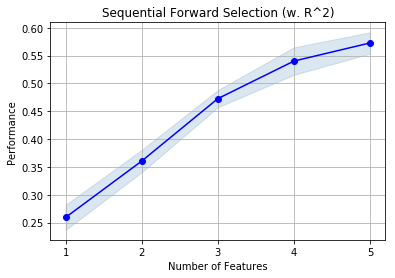

In [70]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

### # Which features we can use?

In [71]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 4, 7]


In [72]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'water', 'superplastic', 'age']


# So we can drop the attributes/ingredients : 'ash','coarseagg','fineagg'

## 2.b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help

In [73]:
#Splitting train and test data
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size =.3,random_state = 123)
train_X = train[[x for x in train.columns if x not in ["strength"] + ["age_months"]]]
train_Y = train["strength"]
test_X  = test[[x for x in test.columns if x not in ["strength"] + ["age_months"]]]
test_Y  = test["strength"]


In [74]:
#MODEL

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

target = "strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=20,scoring="neg_mean_squared_error")
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean())
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())
    
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    
    testy = dtesty.reset_index()["strength"]
    
    ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
    ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)
  #  plt.axhline(testy.mean(),color = "r",linestyle="dashed",label=("original_mean:",testy.mean()))
  #  plt.axhline(prediction[0].mean(),color="b",linestyle = "dashed",label=("prediction_mean:",prediction[0].mean()))
    plt.legend(loc="best")
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    ax.set_facecolor("k")
    
    plt.subplot(212)
    
    if of_type == "coef":
        coef = pd.DataFrame(algorithm.coef_.ravel())
        coef["feat"] = dtrainx.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        coef = pd.DataFrame(algorithm.feature_importances_)
        coef["feat"] = dtrainx.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')

import warnings
warnings.filterwarnings("ignore")


### Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.076741927128777
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -114.16803383252382
cv-std  : 28.61166057717402
cv-max  : -61.65504407969563
cv-min  : -168.58083340834648


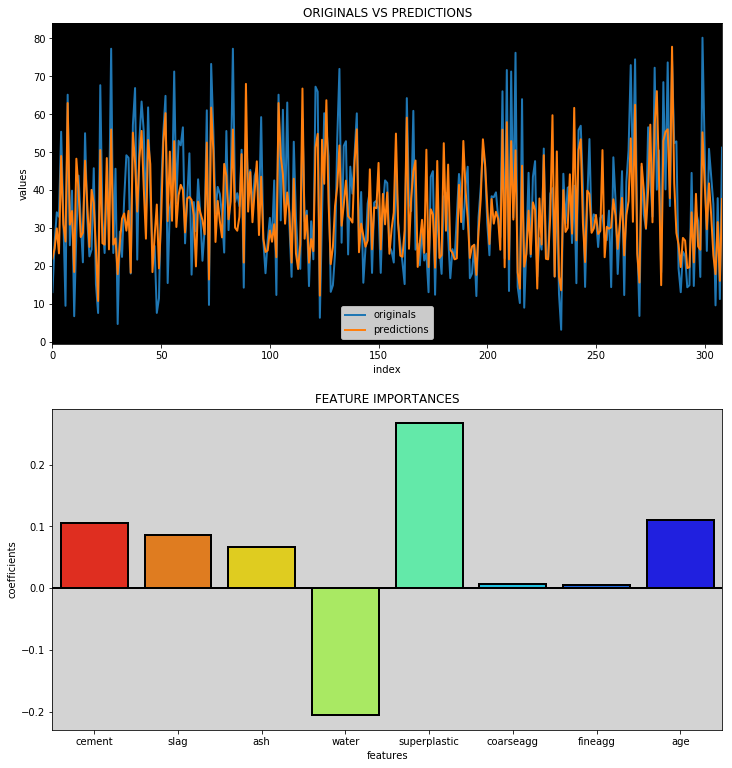

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,train_X,train_Y,test_X,test_Y,"coef")

### Lasso Regression

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.098703563233572
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -114.1280709627863
cv-std  : 28.406715972690694
cv-max  : -62.317893774059065
cv-min  : -170.21067452576474


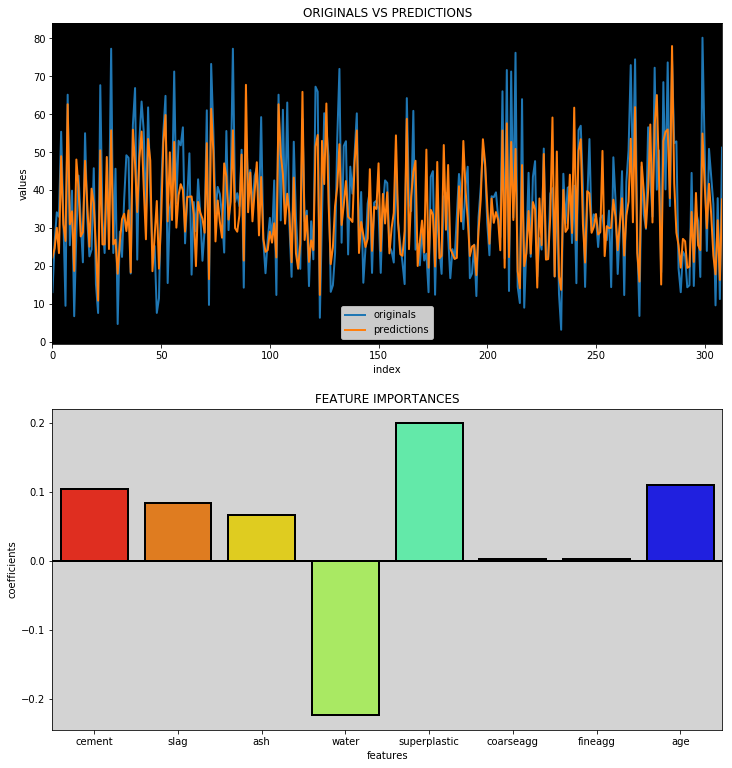

In [76]:
from sklearn.linear_model import Ridge,Lasso
ls = Lasso()
model(ls,train_X,train_Y,test_X,test_Y,"coef")

### Ridge Regression

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.076742460884812
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -114.16796146547881
cv-std  : 28.611506404155215
cv-max  : -61.655312436439125
cv-min  : -168.58145463313346


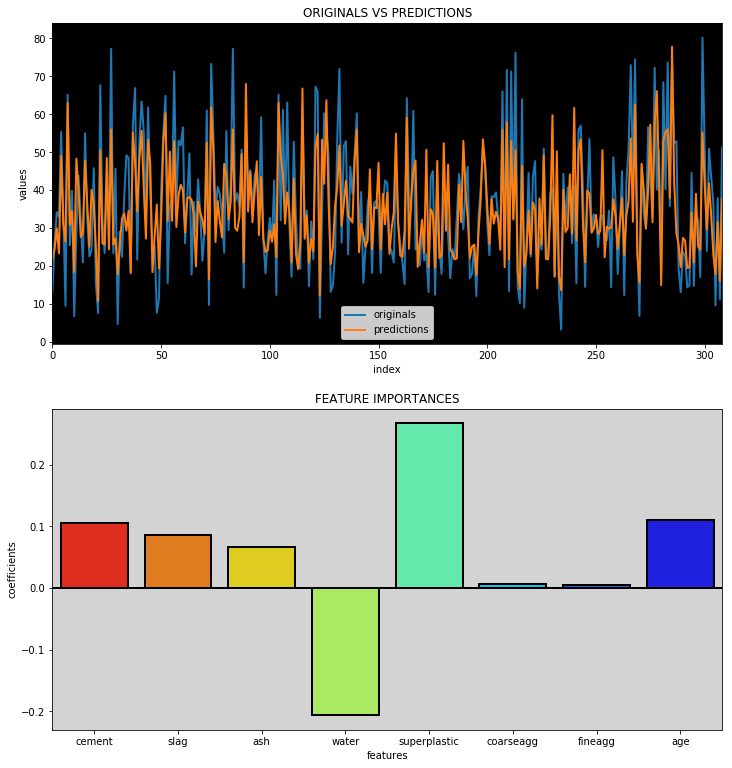

In [77]:
rigde = Ridge()
model(rigde,train_X,train_Y,test_X,test_Y,"coef")

### KNN Regressor

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')
************************************************************************
ROOT MEAN SQUARED ERROR :  9.019473816267226
************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -91.49304839444444
cv-std  : 23.491661073494335
cv-max  : -42.468895
cv-min  : -123.01407077777776


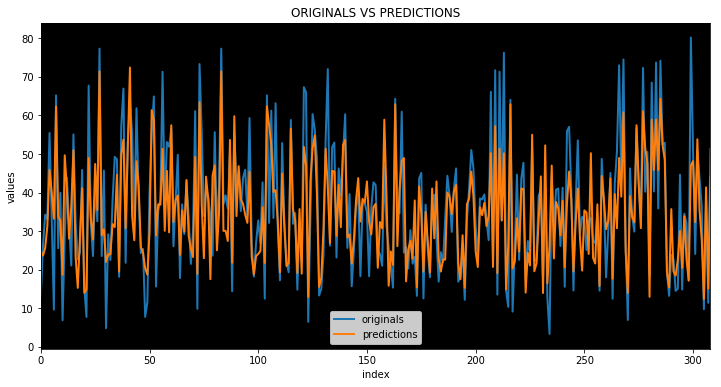

In [78]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(train_X,train_Y)

predictions = knn.predict(test_X)
predictions = pd.DataFrame(predictions)

test_y_new = test_Y.reset_index()
test_y_new = test_y_new["strength"]


ax3 = test_y_new.plot(label="originals",figsize=(12,6),linewidth=2)
ax3 = predictions[0].plot(label="predictions",figsize=(12,6),linewidth=2)
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
ax3.set_facecolor("k")

print (knn)
print ("************************************************************************")
print ("ROOT MEAN SQUARED ERROR : ",np.sqrt(mean_squared_error(test_Y,predictions)))
cross_valid = cross_val_score(knn,train_X,train_Y,cv=20,scoring="neg_mean_squared_error")
cross_valid = cross_valid.ravel()
print ("************************************************************************")
print ("CROSS VALIDATION SCORE")
print ("************************")
print ("cv-mean :",cross_valid.mean())
print ("cv-std  :",cross_valid.std())
print ("cv-max  :",cross_valid.max())
print ("cv-min  :",cross_valid.min())

### Ada Boost Regressor

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 7.379648614186106
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -63.79143734239699
cv-std  : 16.38841574022392
cv-max  : -29.426999448506667
cv-min  : -94.1302324091709


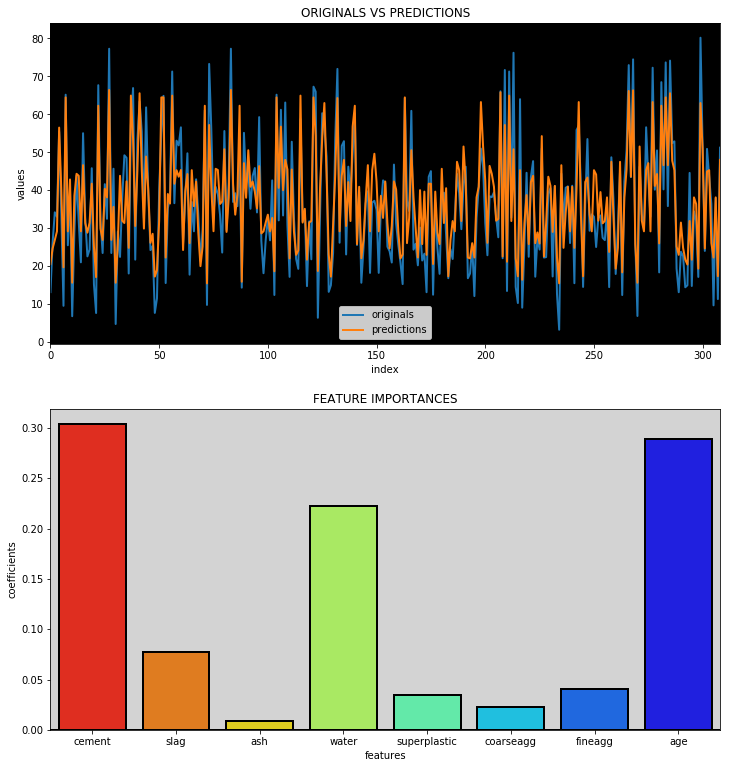

In [79]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model(adb,train_X,train_Y,test_X,test_Y,"feat")

### Random Forest Regressor

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.551898559805483
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -32.738803141669045
cv-std  : 11.699720409360383
cv-max  : -13.794667688271598
cv-min  : -60.98145320447533


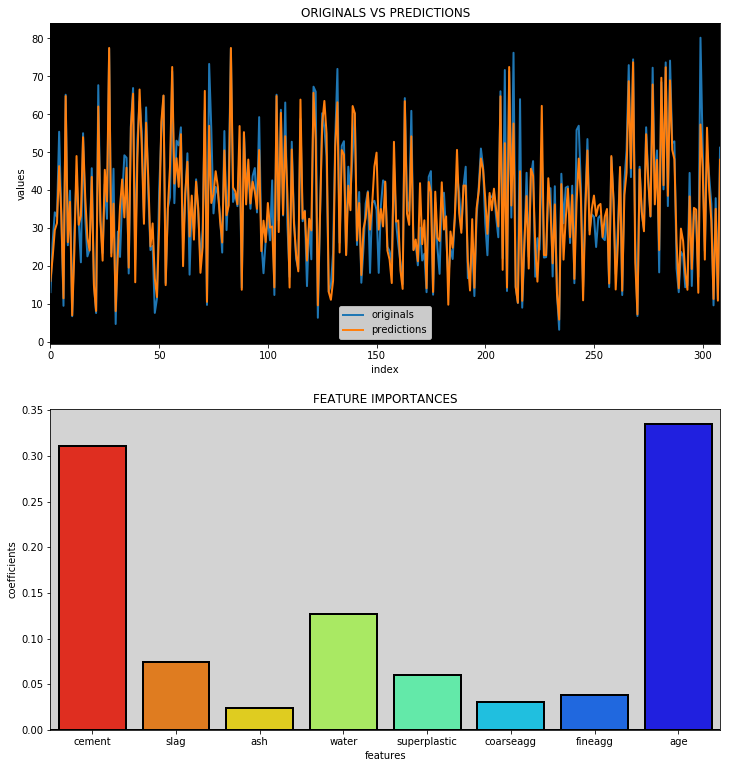

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model(rf,train_X,train_Y,test_X,test_Y,"feat")

### Decision Tree Regressor

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.338240295897883
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -51.20012666291291
cv-std  : 22.937581409899263
cv-max  : -9.437686111111113
cv-min  : -88.60799166666668


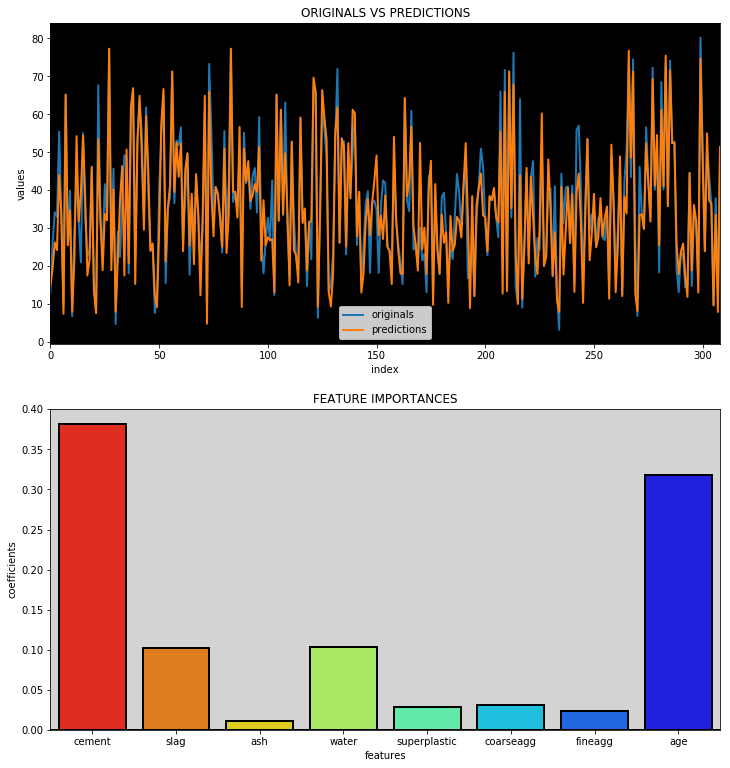

In [81]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,train_X,train_Y,test_X,test_Y,"feat")

### Gradient Boosting Regressor

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.162694599330592
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -28.405981942978077
cv-std  : 8.8995238796835
cv-max  : -12.615713750852853
cv-min  : -46.98859414039706


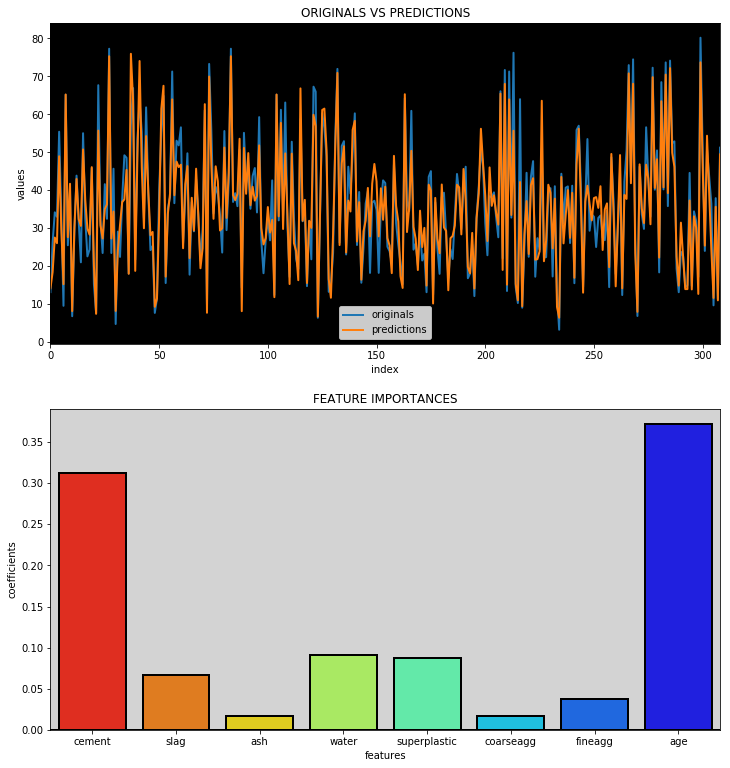

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
model(gbr,train_X,train_Y,test_X,test_Y,"feat")

## The signs of the coefficients (negative or positive) shed a bit of light on the relationship (at least in the linear regression) between the given variables and concrete compressive strength. We cannot  determine the relative importance of each variable with these coefficients. Therefore, let's take a look at the coefficients when they are all brought down to the same scale: between 0 and 1, inclusive.

# From the magnitudes of these coefficients (by ignoring positve or negative sign), the importance of the variables in linear regression is: 
## cement > age > slag > water > superpllesasticizer > flyash > fineaggregate > coarseaggregate.

# 3. Deliverable -3 (create the model )
## a. Obtain feature importance for the individual features using multiple methods and present your findings

# ITERATION 1    --> using original data .... my_data

In [83]:
from sklearn import model_selection

X= my_data.drop(['strength','superplastic'], axis=1) 
y= my_data['strength']
#Splitting the Dataset into Training set and Test Set
train_x,test_x,train_y,test_y = model_selection.train_test_split(X, y, test_size=0.20, random_state=7)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

clf_lr = LinearRegression()
clf_lr.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_lr, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_lr.predict(test_x)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


####### Linear Regression #######
Score : 0.6419
[0.56819467 0.50436233 0.67951656 0.60099226 0.59343968]

MSE    : 92.40 
MAE    : 7.68 
RMSE   : 9.61 
R2     : 0.64 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [85]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
#params = [{'n_estimators':[100,15], 'max_depth':[4,None]}]
#vc = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params,
#                  verbose=1,cv=10,n_jobs=-1)
#res = vc.fit(train_x,train_y)
#print(res.best_score_)
#print(res.best_params_)

clf_lr = RandomForestRegressor()
clf_lr.fit(train_x , train_y)
accuracies = cross_val_score(estimator = clf_lr, X = train_x, y = train_y, cv = 5,verbose = 1)
y_pred = clf_lr.predict(test_x)
print('')
print('####### Forest #######')
print('Score : %.4f' % clf_lr.score(test_x, test_y))
print(accuracies)

mse = mean_squared_error(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred)**0.5
r2 = r2_score(test_y, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


####### Forest #######
Score : 0.9284
[0.86973257 0.85214399 0.89102742 0.88013597 0.88803237]

MSE    : 18.48 
MAE    : 3.28 
RMSE   : 4.30 
R2     : 0.93 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


## Here Random Forest Regression Model gives better accuracy than linear regression.

# ITERATION 2 --> using modified data ....data2 (after data cleaning)

In [86]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(data2.drop(['ash','coarseagg','fineagg','compressive_strength_category'],axis=1), data2['compressive_strength_category'], test_size=0.30,
                                                   random_state=22)
X_train.shape,X_test.shape

((721, 7), (309, 7))

In [87]:
for feature in data2.columns: # Loop through all columns in the dataframe
    if data2[feature].dtype == 'object': # Only apply for columns with categorical strings
        data2[feature] = pd.Categorical(data2[feature]).codes # Replace strings with an integer
        
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 11 columns):
cement                           1030 non-null float64
slag                             1030 non-null float64
ash                              1030 non-null float64
water                            1030 non-null float64
superplastic                     1030 non-null float64
coarseagg                        1030 non-null float64
fineagg                          1030 non-null float64
age                              1030 non-null int64
strength                         1030 non-null float64
age_months                       1030 non-null int8
compressive_strength_category    1030 non-null int8
dtypes: float64(8), int64(1), int8(2)
memory usage: 74.5 KB


### DecisionTreeClassifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [89]:
model_entropy.score(X_train, y_train)

1.0

In [90]:
model_entropy.score(X_test, y_test)

1.0

In [91]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

1.0
1.0


In [92]:
acc_DT = accuracy_score(y_test, preds_pruned)
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree       1.0

### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf


Method  accuracy
0  Decision Tree  1.000000
0  Random Forest  0.996764

### Adaboost

In [94]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree  1.000000
0  Random Forest  0.996764
0       Adaboost  1.000000

### Gradient Boost

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0   Decision Tree  1.000000
0   Random Forest  0.996764
0        Adaboost  1.000000
0  Gradient Boost  1.000000

### Bagging

In [96]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0   Decision Tree  1.000000
0   Random Forest  0.996764
0        Adaboost  1.000000
0  Gradient Boost  1.000000
0         Bagging  1.000000

### K fold Cross Validation

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 20
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)

y = data2['compressive_strength_category']
X = data2.loc[:, data2.columns != 'compressive_strength_category']

results = cross_val_score(rfcl,X, y, cv=kfold)

Kfold_CV=np.around(np.mean(abs(results*100)))

for i in range(num_folds):
    print("Kfold",i,":",results[i]*100,"%\n")

print("Mean:",Kfold_CV,"%")

print("\nStandard Deviation:",results.std())


print("\n\nRandom Forest Accuracy",acc_RF,"%\n\n")

improvement=Kfold_CV-acc_RF
print("Accuracy improvement:",np.around(improvement),"%")


Kfold 0 : 98.07692307692307 %

Kfold 1 : 100.0 %

Kfold 2 : 100.0 %

Kfold 3 : 100.0 %

Kfold 4 : 100.0 %

Kfold 5 : 100.0 %

Kfold 6 : 98.07692307692307 %

Kfold 7 : 98.07692307692307 %

Kfold 8 : 100.0 %

Kfold 9 : 100.0 %

Kfold 10 : 100.0 %

Kfold 11 : 100.0 %

Kfold 12 : 100.0 %

Kfold 13 : 100.0 %

Kfold 14 : 100.0 %

Kfold 15 : 100.0 %

Kfold 16 : 100.0 %

Kfold 17 : 100.0 %

Kfold 18 : 100.0 %

Kfold 19 : 100.0 %

Mean: 100.0 %

Standard Deviation: 0.006866758104368141


Random Forest Accuracy 0.9967637540453075 %


Accuracy improvement: 99.0 %


### Leave One Out Cross-Validation

In [98]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfcl, X_train, y_train, cv=LeaveOneOut())
scores

print("Mean accuracy:",scores.mean()*100,"%")

print("\nRandom Forest Accuracy",acc_RF,"%")

print("\nStandard Deviation:",scores.std())

Leave_One_Out=np.mean(abs(scores.mean()*100))
improvement=Leave_One_Out-acc_RF
print("\nAccuracy improvement:",np.around(improvement),"%")


Mean accuracy: 99.72260748959778 %

Random Forest Accuracy 0.9967637540453075 %

Standard Deviation: 0.05259496595245087

Accuracy improvement: 99.0 %


### Stratified Cross Validation

In [99]:
from sklearn.model_selection  import StratifiedKFold, cross_val_score

k = 20

stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55)
results = cross_val_score(rfcl, X, y, cv = stratified_kfold)

strat_CV=np.around(np.mean(abs(results*100)))

for i in range(k):
    print("Kfold",i,":",results[i]*100,"%\n")

print("\n\nMean:",strat_CV,"%")

print("\nStandard Deviation:",results.std())

print("\n\nRandom Forest Accuracy",acc_RF,"%\n\n")

improvement=strat_CV-acc_RF
print("Accuracy improvement:",np.around(improvement),"%")

Kfold 0 : 98.11320754716981 %

Kfold 1 : 100.0 %

Kfold 2 : 100.0 %

Kfold 3 : 100.0 %

Kfold 4 : 100.0 %

Kfold 5 : 98.11320754716981 %

Kfold 6 : 100.0 %

Kfold 7 : 98.11320754716981 %

Kfold 8 : 100.0 %

Kfold 9 : 100.0 %

Kfold 10 : 100.0 %

Kfold 11 : 100.0 %

Kfold 12 : 100.0 %

Kfold 13 : 100.0 %

Kfold 14 : 100.0 %

Kfold 15 : 100.0 %

Kfold 16 : 100.0 %

Kfold 17 : 100.0 %

Kfold 18 : 96.0 %

Kfold 19 : 100.0 %



Mean: 100.0 %

Standard Deviation: 0.010491380448908771


Random Forest Accuracy 0.9967637540453075 %


Accuracy improvement: 99.0 %


### Bootstrapping

In [100]:
# Number of iterations for bootstrapping
bootstrap_iteration = 75
accuracy = []

from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)
    
accuracy = np.array(accuracy)

print('Standard deviation: ', accuracy.std())

Boot=np.around(accuracy.mean()*100)

print("\n\nMean:",Boot,"%")

print("\nStandard Deviation:",accuracy.std())

print("\n\nRandom Forest Accuracy",acc_RF,"%\n\n")

improvement=Boot-acc_RF
print("Accuracy improvement:",np.around(improvement),"%")

Standard deviation:  0.0018739202373772282


Mean: 100.0 %

Standard Deviation: 0.0018739202373772282


Random Forest Accuracy 0.9967637540453075 %


Accuracy improvement: 99.0 %


## We can see in above records , all the models are giving almost same performance.
## So we can choose any model from all the above

# 4. Deliverable -4 (Tuning the model)
a. Algorithms that you think will be suitable for this project

b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

c. Model performance range at 95% confidence level

## Model Tuning using hyper parameters

In [101]:
for feature in data2.columns: # Loop through all columns in the dataframe
    if data2[feature].dtype == 'object': # Only apply for columns with categorical strings
        data2[feature] = pd.Categorical(data2[feature]).codes # Replace strings with an integer

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 11 columns):
cement                           1030 non-null float64
slag                             1030 non-null float64
ash                              1030 non-null float64
water                            1030 non-null float64
superplastic                     1030 non-null float64
coarseagg                        1030 non-null float64
fineagg                          1030 non-null float64
age                              1030 non-null int64
strength                         1030 non-null float64
age_months                       1030 non-null int8
compressive_strength_category    1030 non-null int8
dtypes: float64(8), int64(1), int8(2)
memory usage: 74.5 KB


In [102]:
#pretty print

from pprint import pprint
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


# 4.b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

## RandomSearchCV

In [103]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [104]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [105]:
# Use the random grid to search for best hyperparameters

for feature in data2.columns: # Loop through all columns in the dataframe
    if data2[feature].dtype == 'object': # Only apply for columns with categorical strings
        data2[feature] = pd.Categorical(data2[feature]).codes # Replace strings with an integer

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   13.5s finished


In [106]:
best_random = rf_random.best_estimator_
Rand_search_cv=np.around(best_random.score(X_test , y_test)*100)

print("Random sarch CV Score:",Rand_search_cv,"%")

print("\n\nRandom Forest Accuracy",acc_RF,"%\n\n")

improvement=Rand_search_cv-acc_RF
print("Accuracy improvement:",np.around(improvement),"%")

Random sarch CV Score: 100.0 %


Random Forest Accuracy 0.9967637540453075 %


Accuracy improvement: 99.0 %


## GridSearchCV

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

rf = RandomForestRegressor(random_state = 1)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X_train, y_train);

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 7}

In [108]:
best_grid = grid_search.best_estimator_

Grid_search_cv=np.around(best_grid.score(X_test, y_test)*100)
print("Grid sarch CV Score:",Grid_search_cv,"%")
RF_Accuracy=acc_RF
print("\n\nRandom Forest Accuracy",RF_Accuracy,"%\n\n")

improvement=Grid_search_cv-RF_Accuracy
print("Accuracy improvement:",np.around(improvement),"%")



Grid sarch CV Score: 98.0 %


Random Forest Accuracy 0.9967637540453075 %


Accuracy improvement: 97.0 %


In [109]:
print("Randon Forest Accuracy:", RF_Accuracy,"%")

print("\nK Fold:", Kfold_CV,"%")

print("\nLeave one Out:", Leave_One_Out,"%")

print("\nStratified CV:", strat_CV,"%")

print("\nBootstrapping:", Boot,"%")

print("\nRandom sarch CV:",Rand_search_cv,"%")

print("\nRandom sarch CV Score:",Grid_search_cv,"%")


Randon Forest Accuracy: 0.9967637540453075 %

K Fold: 100.0 %

Leave one Out: 99.72260748959778 %

Stratified CV: 100.0 %

Bootstrapping: 100.0 %

Random sarch CV: 100.0 %

Random sarch CV Score: 98.0 %


In [110]:
Models=["Randon Forest","K fold","Leave One Out","Stratified CV","Random Search CV","Grid Search CV"]
Best=[RF_Accuracy,Kfold_CV,Leave_One_Out,strat_CV,Boot,Rand_search_cv,Grid_search_cv]
Best=np.array(Best)

In [111]:
best=Best.argmax()
print("Best model is:",Models[best])

Best model is: K fold


# 4.a. Algorithms that you think will be suitable for this project

## -- So from all the above records/Conclusion we can see the best model is "K Fold" model.

# 4.c. Model performance range at 95% confidence level

In [115]:
values = data.values

# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(data) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)


0.9835526315789473
1.0
1.0
0.9966666666666667
0.9867549668874173
1.0
1.0
1.0
1.0
0.9918032786885246
0.9884868421052632
1.0
1.0
0.9967213114754099
1.0
0.9918166939443536
1.0
1.0
1.0
0.9901315789473685
0.9835255354200988
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9967689822294022
0.991869918699187
0.9916387959866221
1.0
0.9884297520661157
1.0
0.9967320261437909
0.9839486356340289
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9967320261437909
1.0
1.0
0.9918962722852512
0.9933554817275747
1.0
0.9966722129783694
1.0
0.9967793880837359
0.9967689822294022
1.0
0.9967479674796748
1.0
0.9967585089141004
1.0
0.9934747145187602
0.9919743178170144
1.0
1.0
0.9918300653594772
1.0
1.0
0.9839228295819936
0.9914236706689536
1.0
1.0
1.0
1.0
1.0
0.9917763157894737
1.0
1.0
0.9967320261437909
1.0
0.99185667752443
0.9967637540453075
1.0
0.9967479674796748
1.0
0.9967266775777414
0.9932432432432432
0.9916107382550335
0.9902120717781403
1.0
0.996694214876033
1.0
0.9968051118210862
1.0
1.0
1.0
1.0
1.0
0.9967266775777414
0.991856

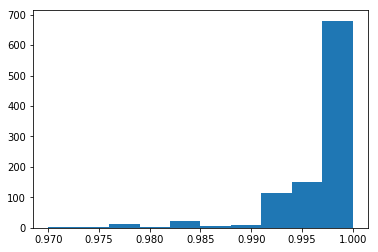

95.0 confidence interval 98.4% and 100.0%


In [116]:
# plot scores
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Model performance range at 95% confidence level is between interval of 98.4% and 100.0%.